In [ ]:
pip install --upgrade scipy --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 19.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
pip install --upgrade gensim numpy --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.1 MB/s eta 0:00:00


Step 1: Load the Wikipedia GLoVE Word2Vec.

In [ ]:
from gensim.models import KeyedVectors
import numpy as np

def load_glove_model(glove_file_path):
    """Load the GloVe model into a gensim KeyedVectors model format."""
    # Initialize an empty dictionary to store the word vectors
    glove_dict = {}

    with open(glove_file_path, 'r', encoding="utf-8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            vector = np.array(split_line[1:], dtype='float32')
            glove_dict[word] = vector

    # Load the dictionary into gensim KeyedVectors
    model = KeyedVectors(vector_size=len(vector))
    model.add_vectors(list(glove_dict.keys()), list(glove_dict.values()))

    return model

# Specify the path to your GLoVe file
glove_file = "glove.6B.50d.txt"  # Update this path

# Load the GLoVe model
model = load_glove_model(glove_file)
print("Loaded GloVe model with", len(model.key_to_index), "words.")


Loaded GloVe model with 400000 words.


In [ ]:
# Ensure words are in the model vocabulary to avoid errors
def safe_similarity(word1, word2, model):
    if word1 in model and word2 in model:
        return model.similarity(word1, word2)
    else:
        return None

print("Similarity between 'man' and 'woman':", safe_similarity("man", "woman", model))
print("Similarity between 'chair' and 'throne':", safe_similarity("chair", "throne", model))
print("Similarity between 'water' and 'baby':", safe_similarity("water", "baby", model))


Similarity between 'man' and 'woman': 0.8860338
Similarity between 'chair' and 'throne': 0.2796809
Similarity between 'water' and 'baby': 0.40810367


Step 3: Using these provide analogies

In [ ]:
# _____ is to King as Woman is to Man
analogy_king_man = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("_____ is to King as Woman is to Man:", analogy_king_man[0][0])

# _____ is to Princess as Man is to Woman
analogy_princess_woman = model.most_similar(positive=['princess', 'man'], negative=['woman'], topn=1)
print("_____ is to Princess as Man is to Woman:", analogy_princess_woman[0][0])

# _____ is to a Woman as a Child is to an Adult
analogy_woman_child = model.most_similar(positive=['woman', 'child'], negative=['adult'], topn=1)
print("_____ is to a Woman as a Child is to an Adult:", analogy_woman_child[0][0])


_____ is to King as Woman is to Man: queen
_____ is to Princess as Man is to Woman: prince
_____ is to a Woman as a Child is to an Adult: mother


Step 4: Apply Naive-Bayes Classifier on the Spam-Ham dataset

In [ ]:
!pip install scipy --quiet

In [ ]:
!pip install sklearn-pandas --quiet

In [ ]:
!pip install scikit-plot --quiet

In [ ]:
import torch
import numpy as np
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import cross_val_score
import pandas as pd
import re
#import scikitplot as skplt
from numpy import interp
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Initialize stemmer
stemmer = PorterStemmer()

# Emotion list for feature engineering
emotions_list = [":)", ":(", ":p", ":D", "-_-", ":o"]

# Function to categorize message length
def char_flag(l):
    if l <= 40:
        return 1
    elif l <= 60:
        return 2
    elif l <= 80:
        return 3
    elif l <= 120:
        return 4
    elif l <= 160:
        return 5
    else:
        return 6

# Text processing function
stop_words = []
def text_process(mess):
    no_punct = re.sub('[^A-Za-z ]+', '', mess.lower())
    return np.array([stemmer.stem(word) for word in no_punct.split() if word not in stop_words])

# Data preprocessing
def preprocessing_text():
    for d, ln in zip(messages_data, token_4):
        token_1.append(d)
        token_2.append(d.count('$'))
        x = re.sub('[^0-9 ]+', '', d.lower())
        token_3.append(len(x))
        token_5.append(char_flag(ln))
        if re.sub(r'[^://@]', '', d.lower()) != '':
            token_6.append(1)
        else:
            token_6.append(0)
        token_7.append(len(x.split()))
        for emoji in emotions_list:
            if re.search(re.escape(emoji), d):
                token_8.append(1)
            else:
                token_8.append(0)
    return np.array(
        [np.array([token_1[i], token_2[i], token_3[i], token_4[i], token_5[i], token_6[i],
                   token_7[i], token_8[i]], dtype=object) for i in range(len(messages_data))]
    )



In [ ]:
# Data mapper function
def data_mapper():
    data = preprocessing_text()
    labels = ['message', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
    df = pd.DataFrame.from_records(data, columns=labels)
    mapper = DataFrameMapper([
        (['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'], None),
        ('message', CountVectorizer(analyzer=text_process, ngram_range=(2, 2)))
    ])
    X = mapper.fit_transform(df)
    return X

In [ ]:
# Main code execution
if __name__ == "__main__":
    # Load the dataset
    messages = pd.read_csv("spam.csv", encoding='latin-1')
    messages = messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
    messages['length'] = messages['v2'].apply(len)
    messages_data = messages['v2']
    messages_labels = messages['v1']

In [ ]:
# Initialize tokens
token_1 = []
token_2 = []
token_3 = []
token_4 = messages['length']
token_5 = []
token_6 = []
token_7 = []
token_8 = []

In [ ]:
# Set stop words
freq = pd.Series(' '.join(messages_data).split()).value_counts()
stop_words = stopwords.words('english')
stop_words.extend(freq[-9268:].index)  # Extend stop words list

In [ ]:
    # Map data
mapped_data = data_mapper()

    # Split dataset
trainset, testset, trainlabel, testlabel = train_test_split(mapped_data, messages_labels, test_size=0.33, random_state=42)

    # Apply Naive Bayes Classifier
NB = MultinomialNB()
NB.fit(trainset, trainlabel)
predicted_values_nb = NB.predict(testset)

    # Accuracy
accuracy_NB = accuracy_score(testlabel, predicted_values_nb)

    # Cross-validation
clf_nb = MultinomialNB()
scores_nb = cross_val_score(clf_nb, trainset, trainlabel, cv=5)
print ('\n')
print(f"Acurracy of Naive-Bayes Classifier: {accuracy_NB:.2f}")
print("validation scores of Naive-Bayes Classifier: ", scores_nb)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:537: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(




Acurracy of Naive-Bayes Classifier: 0.98
validation scores of Naive-Bayes Classifier:  [0.98393574 0.9772423  0.98393574 0.98659517 0.97989276]


In [ ]:
# Generate classification report
report_NB = classification_report(testlabel, predicted_values_nb, target_names=["ham", "spam"])
print("Classification Report for Naive-Bayes Classifier:\n", report_NB)

Classification Report for Naive-Bayes Classifier:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1587
        spam       0.96      0.92      0.94       252

    accuracy                           0.98      1839
   macro avg       0.97      0.96      0.97      1839
weighted avg       0.98      0.98      0.98      1839



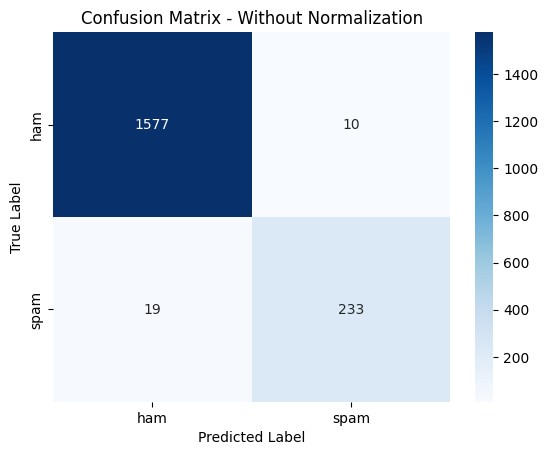

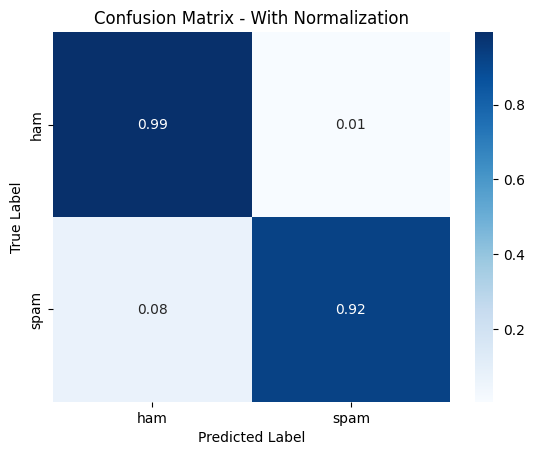

In [ ]:
# Assuming `testlabel` and `predicted_values_nb` are your actual and predicted labels
conf_matrix = confusion_matrix(testlabel, predicted_values_nb, labels=["ham", "spam"])

# Plot without normalization
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
plt.title("Confusion Matrix - Without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot with normalization
conf_matrix_normalized = confusion_matrix(testlabel, predicted_values_nb, labels=["ham", "spam"], normalize='true')
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
plt.title("Confusion Matrix - With Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
